In [9]:
import glob
import os
import numpy as np
import shutil
import time
import matplotlib.pyplot as plt
import seaborn as sns

/Users/yanjiao/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data_dir=r'/Users/yanjiao/Downloads/BS6207-assignment4'
artifacts_dir="artifacts"
cancer_regions='cancer_regions'
normal_regions='normal_regions'
other='other'

In [10]:

def return_sort_image_list(data_dir,file_dir):
    file_list=os.listdir(os.path.join(data_dir, file_dir))
    li=[]
    for file in file_list:
        num=int(file.split('.')[0])
        li.append(num)
    li.sort()
    return_list=[]
    for i in li:
        name=str(i)+'.png'
        return_list.append(name)
    return return_list

In [11]:
artifacts_li=return_sort_image_list(data_dir,artifacts_dir)
cancer_li=return_sort_image_list(data_dir,cancer_regions)
normal_li=return_sort_image_list(data_dir,normal_regions)
other_li=return_sort_image_list(data_dir,other)

In [12]:
from PIL import Image
def mkdir_if_not_exist(path): 
    if not os.path.exists(path):
        os.makedirs(path)
def change_name(data_dir,file_dir,file_list):
    i = 0
    new_path = data_dir+"/new"
    new_name_list = []
    for image_name in file_list:
        path = os.path.join(data_dir,file_dir,image_name)
        im = Image.open(path)
        new_name = file_dir + "_{}.png".format(str(i))
        save_path = os.path.join(new_path,file_dir)
        mkdir_if_not_exist(save_path)
        im.save(os.path.join(new_path,file_dir,new_name))
        new_name_list.append(new_name)
        i = i+1
    return new_name_list   

In [13]:
artifacts_new_li=change_name(data_dir,artifacts_dir,artifacts_li)
cancer__new_li=change_name(data_dir,cancer_regions,cancer_li)
normal_new_li=change_name(data_dir,normal_regions,normal_li)
other_new_li=change_name(data_dir,other,other_li)

KeyboardInterrupt: 

In [7]:
all_image_files=glob.glob(os.path.join(data_dir,artifacts_dir,"*"))\
+glob.glob(os.path.join(data_dir,cancer_regions,"*"))\
+glob.glob(os.path.join(data_dir,normal_regions,"*"))\
+glob.glob(os.path.join(data_dir,other,"*"))

In [ ]:

import cv2
# calculate means and std
 
img_h, img_w = 128, 128
imgs = np.zeros([img_w, img_h, 3, 1])
means, stdevs = [], []


all_image_files=glob.glob(os.path.join(data_dir,artifacts_dir,"*"))\
+glob.glob(os.path.join(data_dir,cancer_regions,"*"))\
+glob.glob(os.path.join(data_dir,normal_regions,"*"))\
+glob.glob(os.path.join(data_dir,other,"*"))

for i in range(len(all_image_files)):
    img_path = all_image_files[i]
    img = cv2.imread(img_path)
    img = img[:, :, :, np.newaxis]    
    imgs = np.concatenate((imgs, img), axis=3)
imgs = imgs.astype(np.float32)/255

In [15]:
train_dir=os.path.join(data_dir,'new','trainSet')
train_valid_dir=os.path.join(data_dir,'new','train_valid_Set')
valid_dir=os.path.join(data_dir,'new','validSet')
test_dir=os.path.join(data_dir,'new','testSet')
train_valid_dir

'/Users/yanjiao/Downloads/BS6207-assignment4/new/train_valid_Set'

In [74]:
def copy_to_files(new_data_dir,data_dir,file_dir,file_list,test_size,valid_ratio):
    train_dir,valid_dir,test_dir,train_valid_dir=new_data_dir
    train_dir=train_dir+'/'+file_dir
    valid_dir=valid_dir+"/"+file_dir
    test_dir=test_dir+"/"+file_dir
    trian_valid_dir=train_valid_dir+"/"+file_dir
    
    mkdir_if_not_exist(train_dir)
    mkdir_if_not_exist(valid_dir)
    mkdir_if_not_exist(test_dir)
    mkdir_if_not_exist(trian_valid_dir)
    
    #get test_files
    test_lists=file_list[0:test_size]    
    
    #get train and valid files
    remain_list=list(set(file_list)-set(test_lists))
    
    #copy to train_set
    for i_name in remain_list:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),train_valid_dir+'/'+i_name)
    
    valid_lists=np.random.choice(remain_list,size=int(len(remain_list)*valid_ratio),replace=False)
    train_lists=list(set(remain_list)-set(valid_lists))
    np.random.shuffle(train_lists)
    

    
    #copy to train_set
    for i_name in train_lists:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),train_dir+'/'+i_name)
        
    #copy to valid_set
    for i_name in valid_lists:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),valid_dir+'/'+i_name)
        
    #copy to test_set
    for i_name in test_lists:
        shutil.copy(os.path.join(data_dir,'new',file_dir,i_name),test_dir+"/"+i_name)

In [75]:
new_data_dir=[train_dir,valid_dir,test_dir,train_valid_dir]
copy_to_files(new_data_dir,data_dir,artifacts_dir,artifacts_new_li,100,0.2)
copy_to_files(new_data_dir,data_dir,cancer_regions,cancer__new_li,100,0.2)
copy_to_files(new_data_dir,data_dir,normal_regions,normal_new_li,100,0.2)
copy_to_files(new_data_dir,data_dir,other,other_new_li,100,0.2)

In [16]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
train_transform=transforms.Compose([
    transforms.RandomResizedCrop(128, scale=(0.64, 1.0),ratio=(1.0,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
    transforms.ToTensor(),
   
])

test_transform=transforms.Compose([
    transforms.ToTensor(),
   
])

#generate dataloader
train_ds=ImageFolder(train_dir,transform=train_transform)
valid_ds=ImageFolder(valid_dir,transform=test_transform)
test_ds=ImageFolder(test_dir,transform=test_transform)

In [28]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1, stride=2)
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1, stride=2)
        self.batchnorm2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1, stride=2)
        self.batchnorm3 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(256 * 2 *2, 512)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(512, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = F.relu(x)
        x = self.pool1(x) #torch.Size([32, 64, 32, 32])
        
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = F.relu(x)
        x = self.pool2(x) # torch.Size([32, 128, 8, 8])
        
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = F.relu(x)
        x = self.pool3(x) # torch.Size([32, 256, 2, 2])
        
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [21]:
batch_size=64
train_iter=DataLoader(train_ds,batch_size, shuffle=True)
valid_iter=DataLoader(valid_ds,batch_size, shuffle=True)
test_iter=DataLoader(test_ds,batch_size, shuffle=True)

In [22]:
# hyperparameters
lr=0.01
dropout=0.6

In [55]:
def train(net,train_iter,valid_iter,optim,epoches,early_stop=False,name=None):
    history_loss=dict()
    history_acc=dict()
    history_loss["val"]=[]
    history_loss["train"]=[]
        
    history_acc["val"]=[]
    history_acc["train"]=[]
    best_acc=0
    for epoch in range(epoches):
        print("processing the {} epoch".format(epoch))
        epoch_start_time = time.time()
        train_acc = []
        train_loss = []
        val_acc = []
        val_loss = []
        len_train=0
        net.train()
        for batch_x,batch_y in train_iter:
#             print(batch_x.shape)
#             print(batch_y.shape)
            y_hat=net(batch_x)
            l=loss(y_hat,batch_y)
            optim.zero_grad()
            l.backward()
            optim.step()
            train_acc.append(np.sum(np.argmax(y_hat.detach().numpy(),axis=1)==batch_y.detach().numpy()))
            train_loss.append(l.item())
#             print("finish {} batch in {} epoch".format(i,epoch))
            len_train+=batch_x.shape[0]
        train_loss=np.sum(train_loss)/len_train
        train_acc=np.sum(train_acc)/len_train
        history_loss["train"].append(train_loss)
        history_acc["train"].append(train_acc)
        if valid_iter is not None:
            #eval
            net.eval()
            len_val=0
            with torch.no_grad():
                for batch_x,batch_y in valid_iter:
                    y_hat=net(batch_x)
                    l=loss(y_hat,batch_y)
                    val_acc.append(np.sum(np.argmax(y_hat.numpy(),axis=1)==batch_y.numpy()))
                    val_loss.append(l.item())
                    len_val+=batch_x.shape[0]

            val_loss=np.sum(val_loss)/len_val
            val_acc=np.sum(val_acc)/len_val
            history_loss["val"].append(val_loss)
            history_acc["val"].append(val_acc)
            print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f | Val Acc: %3.6f loss: %3.6f' % \
                    (epoch + 1, epoches, time.time()-epoch_start_time, \
                     train_acc, train_loss, val_acc, val_loss))          
        else:
            print('[%03d/%03d] %2.2f sec(s) Train Acc: %3.6f Loss: %3.6f' % \
                    (epoch + 1, epoches, time.time()-epoch_start_time, \
                     train_acc, train_loss))
        if name==None:
            PATH = r'/Users/yanjiao/Downloads/BS6207-assignment4/Model/model_epoch_{}'.format(epoch)
            #mkdir_if_not_exist(PATH)
        else:
            PATH = r'/Users/yanjiao/Downloads/BS6207-assignment4/Model/{}_epoch_{}'.format(name,epoch)
           # mkdir_if_not_exist(PATH)
        #PATH = os.path.join(PATH, 'checkpoint_model_epoch_{}.pth.tar'.format(epoch))
            
        #self-implement early stop
        if early_stop==True:
            if val_acc > best_acc:
                best_acc = val_acc
                es = 0
                
                torch.save(net.state_dict(), PATH)
                print('Model saved at {}'.format(PATH))
            else:
                es += 1
                print("Counter {} of 10".format(es))
            if es > 9:
                print("Early stopping with best_acc: ", best_acc, "and val_acc for this epoch: ", val_acc, "...")
                break
        else:
            if epoch%2==0:
                torch.save(net.state_dict(), PATH)
                print('Model saved at {}'.format(PATH))
            
    return history_loss,history_acc

In [29]:
model_normal=Net()
optim=torch.optim.Adam(model_normal.parameters(),lr=lr)
loss=nn.CrossEntropyLoss()

In [30]:
his_loss,his_acc=train(model_normal,train_iter,valid_iter,optim,30,early_stop=False, name="model_normal")

processing the 0 epoch
[001/030] 65.81 sec(s) Train Acc: 0.644976 Loss: 0.023802 | Val Acc: 0.602761 loss: 0.025095
Model saved at /Users/yanjiao/Downloads/BS6207-assignment4/Model/model_normal_epoch_0/checkpoint_model_epoch_0.pth.tar
processing the 1 epoch
[002/030] 73.42 sec(s) Train Acc: 0.734928 Loss: 0.010778 | Val Acc: 0.717791 loss: 0.011722
processing the 2 epoch
[003/030] 73.10 sec(s) Train Acc: 0.773971 Loss: 0.009252 | Val Acc: 0.583589 loss: 0.017615
Model saved at /Users/yanjiao/Downloads/BS6207-assignment4/Model/model_normal_epoch_2/checkpoint_model_epoch_2.pth.tar
processing the 3 epoch
[004/030] 77.35 sec(s) Train Acc: 0.800766 Loss: 0.008654 | Val Acc: 0.690951 loss: 0.034792
processing the 4 epoch
[005/030] 72.94 sec(s) Train Acc: 0.816268 Loss: 0.007962 | Val Acc: 0.756135 loss: 0.014178
Model saved at /Users/yanjiao/Downloads/BS6207-assignment4/Model/model_normal_epoch_4/checkpoint_model_epoch_4.pth.tar
processing the 5 epoch
[006/030] 71.54 sec(s) Train Acc: 0.8430

In [31]:
def test(net,test_iter):
    
    for epoch in range(1):
        print("processing the {} epoch".format(epoch))
        epoch_start_time = time.time()
        #eval
        net.eval()
        test_acc=[]
        test_loss=[]
        len_test=0
        with torch.no_grad():
            for batch_x,batch_y in test_iter:
                y_hat=net(batch_x)
                l=loss(y_hat,batch_y)
                test_acc.append(np.sum(np.argmax(y_hat.numpy(),axis=1)==batch_y.numpy()))
                test_loss.append(l.item())
                len_test+=batch_x.shape[0]
            
        test_loss=np.sum(test_loss)/len_test
        test_acc=np.sum(test_acc)/len_test
        print('[%03d/%03d] %2.2f sec(s) Test Acc: %3.6f Loss: %3.6f' % \
                (epoch + 1, 1, time.time()-epoch_start_time, \
                 test_acc, test_loss))

In [35]:
train_acc_normal  = his_acc[ 'train']
val_acc_normal=his_acc[ 'val']

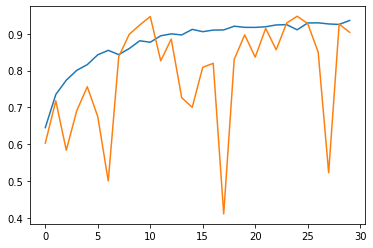

In [36]:
plt.plot(train_acc_normal)
plt.plot(val_acc_normal)

In [ ]:
path=r'/Users/yanjiao/Downloads/BS6207-assignment4/Model/model_normal_epoch_26/checkpoint_model_epoch_26.pth.tar'

model_normal=CNNModel_pool_normal()
checkpoint = torch.load(path)

state_dict  = checkpoint['state_dict']
model_normal.load_state_dict(state_dict)
#model_normal=CNNModel_pool_normal()
#model_normal.load_state_dict(torch.load(path))
test(model_normal,test_iter)

In [58]:
# tuning Learning rate
lr=[0.1,0.001,0.0001]
history=[]
for i in lr:
    loss=nn.CrossEntropyLoss()
    model_normal=Net()
    optim=torch.optim.Adam(model_normal.parameters(),lr=i)
    his_loss,his_acc=train(model_normal,train_iter,valid_iter,optim,13,early_stop=True,name="model_normal_learningrate_{}".format(i))
    history.append((his_loss,his_acc,model_normal,optim))
    print("Finish the learning rate {}".format(i))
    print("_"*10)

processing the 0 epoch
[001/013] 76.76 sec(s) Train Acc: 0.467560 Loss: 0.445882 | Val Acc: 0.473160 loss: 0.018793
Model saved at /Users/yanjiao/Downloads/BS6207-assignment4/Model/model_normal_learningrate_0.1_epoch_0
processing the 1 epoch
[002/013] 74.62 sec(s) Train Acc: 0.452440 Loss: 0.018559 | Val Acc: 0.450920 loss: 0.018962
Counter 1 of 10
processing the 2 epoch
[003/013] 72.13 sec(s) Train Acc: 0.530718 Loss: 0.017820 | Val Acc: 0.458589 loss: 0.019100
Counter 2 of 10
processing the 3 epoch
[004/013] 72.93 sec(s) Train Acc: 0.611292 Loss: 0.015908 | Val Acc: 0.740031 loss: 0.012064
Model saved at /Users/yanjiao/Downloads/BS6207-assignment4/Model/model_normal_learningrate_0.1_epoch_3
processing the 4 epoch
[005/013] 75.72 sec(s) Train Acc: 0.682297 Loss: 0.013636 | Val Acc: 0.740798 loss: 0.011338
Model saved at /Users/yanjiao/Downloads/BS6207-assignment4/Model/model_normal_learningrate_0.1_epoch_4
processing the 5 epoch
[006/013] 77.89 sec(s) Train Acc: 0.682679 Loss: 0.01373

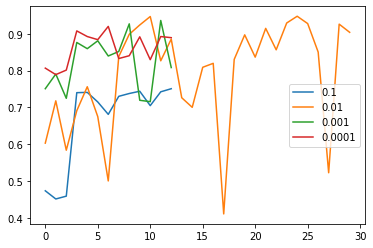

In [59]:
plt.plot(history[0][1]["val"])
plt.plot(val_acc_normal)
plt.plot(history[1][1]["val"])
plt.plot(history[2][1]["val"])
plt.legend([0.1,0.01,0.001,0.0001])

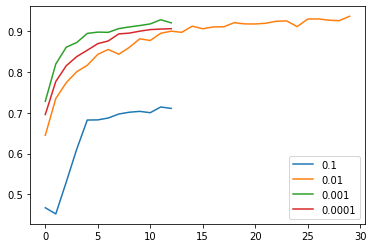

In [60]:
plt.plot(history[0][1]["train"])
plt.plot(train_acc_normal)
plt.plot(history[1][1]["train"])
plt.plot(history[2][1]["train"])
plt.legend([0.1,0.01,0.001,0.0001])

In [ ]:
PATH =r'/Users/yanjiao/Downloads/BS6207-assignment4/Model/{}_lr_{}.txt'.format("model_normal",str(0.001))
torch.save(history[1][2].state_dict(),PATH)

In [ ]:
test(history[1][2],test_iter)